In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset to the python environment.


In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Check for the null values present in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# The number of males and females participated in the test.

In [4]:
h=df['gender'].value_counts()
h

female    518
male      482
Name: gender, dtype: int64

# Inferences about the students parental level of education

In [5]:
m=df.groupby(df['parental level of education']).count().apply(lambda r: (r/r.sum())*100)
m['gender']

parental level of education
associate's degree    22.2
bachelor's degree     11.8
high school           19.6
master's degree        5.9
some college          22.6
some high school      17.9
Name: gender, dtype: float64

In [6]:
l=pd.crosstab(df['parental level of education'],df['gender']).apply(lambda r: (r/r.sum())*100, axis=1)
l

gender,female,male
parental level of education,,
associate's degree,52.252252,47.747748
bachelor's degree,53.389831,46.610169
high school,47.959184,52.040816
master's degree,61.016949,38.983051
some college,52.212389,47.787611
some high school,50.837989,49.162011


Text(0, 0.5, 'Percentage of parental qualification')

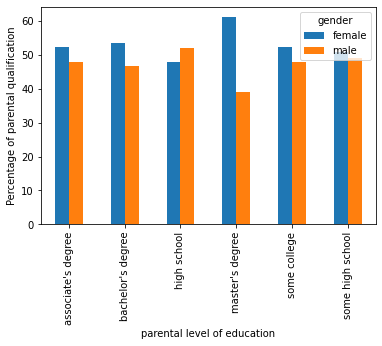

In [7]:
l.plot(kind='bar')
plt.ylabel('Percentage of parental qualification')

Conclusion
1.Most of the parents have some college education(62.5%) and only a few have a masters degree(5.9%)

2. Parental education is more for female students parents than male students except in the case of the parents having their equcation level upto high school
 


# Who scores the most on average for math, reading and writing based on  Gender


In [8]:
df['Total']=df['math score']+df['reading score']+df['writing score']

In [9]:
o=df.groupby(df['gender']).mean()
o

,math score,reading score,writing score,Total
gender,,,,
female,63.376448,72.590734,72.467181,208.434363
male,68.821577,65.545643,63.446058,197.813278


Conclusion
For maths male has more average mark than females but for writting and reading average marks of females is more than 
that of males. But on the average total marks(that is the sum of maths,reading and writing) of females dominate males


# Who scores the most on average for math, reading and writing based on Test preparation course

In [10]:
p=df.groupby(df['test preparation course']).mean()
p

,math score,reading score,writing score,Total
test preparation course,,,,
completed,69.96648,74.175978,74.684358,218.826816
none,63.78972,66.417445,64.457944,194.665109


Conclusion:
Those who have completed the test preparation course have more average score for math,reading and writing than those donot have test preparation also 
has a most average in total(that is the sum of maths,reading and writing scores) 

That is test preparation has significant impact on the scores of individual subjects and the total

# The scoring variation for math, reading and writing based on Gender

 

In [11]:
r=(df.groupby(df['gender']).std()/df.groupby(df['gender']).mean())*100
r

,math score,reading score,writing score,Total
gender,,,,
female,25.293194,19.852421,20.484917,21.162921
male,21.150941,21.587391,22.424127,21.032230


Conclusion:
The math score of male is more consistent(that is have less coefficient of variation) than female whereas for reading and writing females are more consistent than male.But overall for the  total score (that is the sum of maths,reading and writing) males are slightly more consitent than females      

# The scoring variation for math, reading and writing based on Test preparation course

In [12]:
s=(df.groupby(df['test preparation course']).std()/df.groupby(df['test preparation course']).mean())*100
s

,math score,reading score,writing score,Total
test preparation course,,,,
completed,20.755434,18.250615,17.723139,17.744490
none,24.621034,21.995571,23.335629,22.173447


Conclusion:The math,reading and writing score is consistent (that is have less coefficient of variation) for the students who have completed the test preparation course than that of them who has not done any test preparation.Also total score(that is the sum of maths,reading and writing) is more consitent for those who have completed the test preparation score


# The management needs  to give bonus points to the top 25% of students based on their maths score


In [13]:
l=df.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')
l

math score        77.00
reading score     79.25
writing score     79.00
Total            233.25
Name: 0.75, dtype: float64

In [14]:
w=df.loc[(df['math score'] >=l['math score'])]
w

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total
414,female,group A,high school,free/reduced,completed,77,88,85,250
415,female,group B,master's degree,free/reduced,completed,77,97,94,268
416,female,group B,bachelor's degree,free/reduced,none,77,85,87,249
417,female,group B,master's degree,standard,none,77,90,84,251
418,female,group B,high school,standard,completed,77,82,89,248
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,267
996,male,group A,some college,standard,completed,100,96,86,282
997,male,group D,some college,standard,completed,100,97,99,296
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293


Conclusion: There are 255 students who got top 25% score in maths ie score above 77 out of 100. So management give the bonus marks those students who got 77 marks or more for maths